# Project_1 with Linear Regression

**Problem Statement**

We need to predict the chance of admission based on the students various scores.

Features or Independent variables:
- GRE Score
- TOEFL Score
- University Rating
- SOP
- LOR
- CGPA
- Research

Label/ Target:
- Chance of Admit


##### Always refer sklean official documentation if you are not sure about syntax or parameter.

https://scikit-learn.org/stable/

In [1]:
# Let's Start with importing necessary libraries

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler  
# To convert normal data to a standard data (so that all feature will be used equally by model)

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
# We are importing train_test_split to split the data into 2 parts (for training & testing)

# import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
# allows you to save your ML models
# to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file and convert into dataframe

data =pd.read_csv("Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
# Understandind data at high level. check the statistics of data set
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


###### Checking NAN Values
Analysing dataset has for NAN (NULL) values - which will not help in predictions.

In the above Data we can observe that the total count of data is 500 but GRE Score, TOEFL Score & University rating shows 485, 490 & 485 count. this means they are missing 15 -10 values. 

- GRE Score = 15 NAN (Missing value)
- TOEFL Score = 10 NAN (Missing value)
- University Rating = 15 NAN (Missing Value)


- **Use mean for Continues data which is GRE Score, TOEFL Score, CGPA. (not fluctuating)**
- **Use mode for Discrete data = University Rating, SOP, LOR, Research (fluctuation in data)**

In [5]:
# Fill the null values

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
# NOTE:: For categorical or Discrete DATA we will use MODE meathod only.
# As University Rating contains data set of Max value 5 & Min value 1. 
# If we use Mean method it will come out to be 2.70/3.10 which will 'Fill' NAN (NULL) Value with mean of 2 or 3. 
# So we will use Mode method which will only fill data based on number of NAN value.

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())  
# NOTE:: For Continues DATA we will use MEAN method 

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())
# NOTE:: For Continues DATA we will use MEAN method 

In [6]:
# Verifying if the NAN (NULL) Values are filled!
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


###### Checking unwanted Feature
Also we can observe Serial No. is not a required feature (which will not effect pridictions), So we will remove the unwanted data.

In [7]:
# Dropping/ Removing/ Deleting unwanted columns 
# (As unwanted data such as serial number, NAME, Identity number are the kind of data which are useless for predicting model)

data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


###### >>IMPORTANT POINT<<

Standard deviation(std) should be as less as possible. So Data prediction will be good only if the Value of Standard deviation is lesser then Mean value of each feature.

Don't analyze label data only.

>Step's to take before building model

- Importing neccesary libraries
- Understanding what is the need for building a prediction model
- Understanding the data (feature & label)
- checking the data count
- check detail description of data with Data.describe()
- checking for NAN values
- Checking for unwanted feature (e.g Serial number)
- Removing unwanted feature that will not help predicting


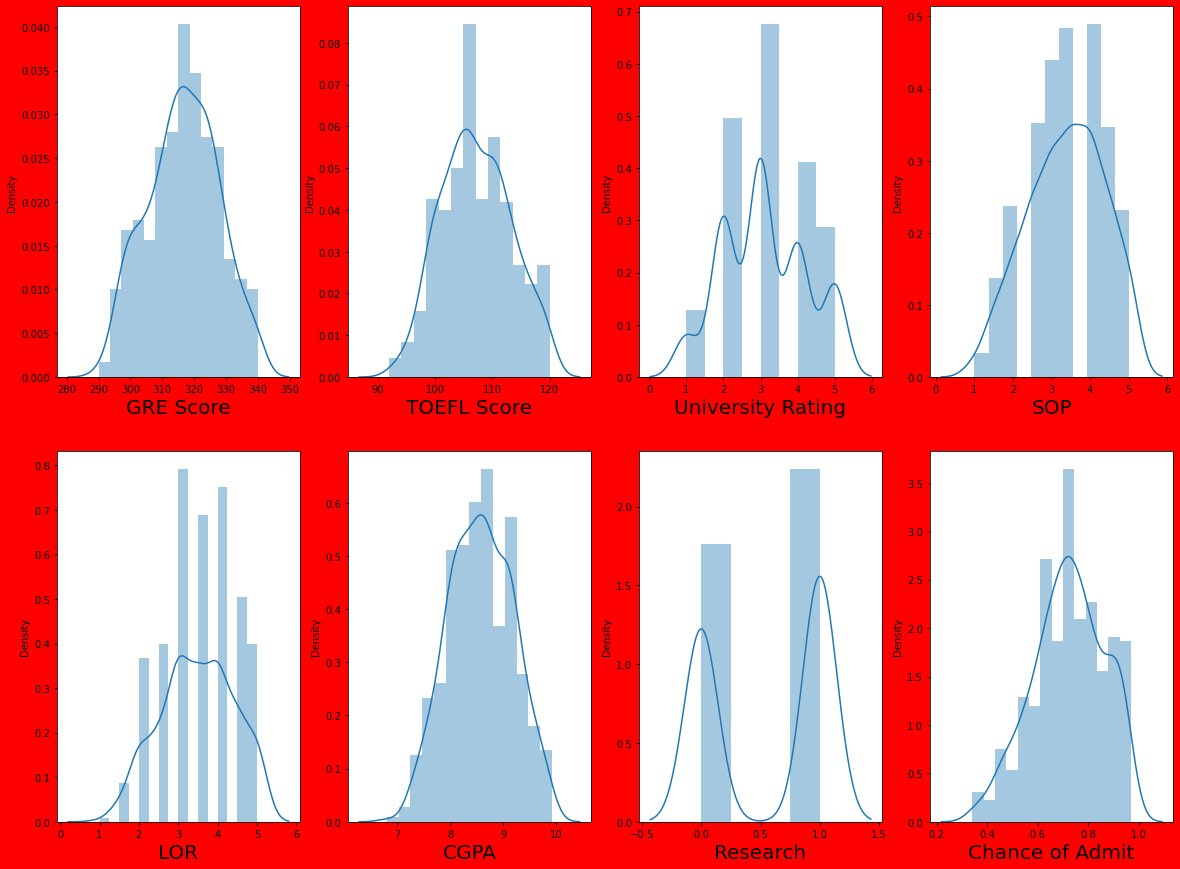

In [8]:
# Let's Visualize the data and analyze the relationship between independent and dependent varaibles:

# Let's see how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='red')  # plot figure with figure size 20cm height into 15cm width + red background
plotnumber = 1 #creating plot number as 1 (reason due to for loop) when plotnumber is 1 loop will go back & forth.

for column in data:      #Using for loop to take/plot each feature/ column one by one from data
    if plotnumber<=8:    #asking control to enter (if) plot is less then or equal to 8 (8 = eight columns in the dataset)
        ax = plt.subplot(2,4,plotnumber) #when more then one graph is to be ploted we use subplot (2 = row & 4 = column) 
        sns.distplot(data[column])  # seaborn.distributionplot (plot distribution in each column) - The wave like graph 
        plt.xlabel(column,fontsize=20) # Label each plot with it's column name (size of colum name in graph = 20)
    
    plotnumber+=1 #after ploting all the 8 columns we will close/stop the for loop to continue by adding +=1 in it's loop.
plt.show()  # we can use plt.tight_layout() also to keep & show the layout in frame of your notebook only

Before we move forward. We have to check if the data has distributed equally. we need to check for Continues data & Discrete data.
- Continues data = GRE Score, TOEFL Score, CGPA. (not fluctuating)
- Discrete data = University Rating, SOP, LOR, Research (fluctuation in data)

The data distribution does looks decent enough and there doesn't seems to be any skewness.

##### Model will use linear regression formula which is y = mx + b or y = mx + c

Where,
- y = prediction
- m = slope/coefficient
- x = feature
- b = intercept

In [9]:
# Now dividing data set into seperate data of feature and label.

y = data['Chance of Admit']  
# Keeping chance of admit (label) in y variable

x = data.drop(columns = ['Chance of Admit']) 
#removing chance of admit from x variable (then the remaining data will be features)

In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [11]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


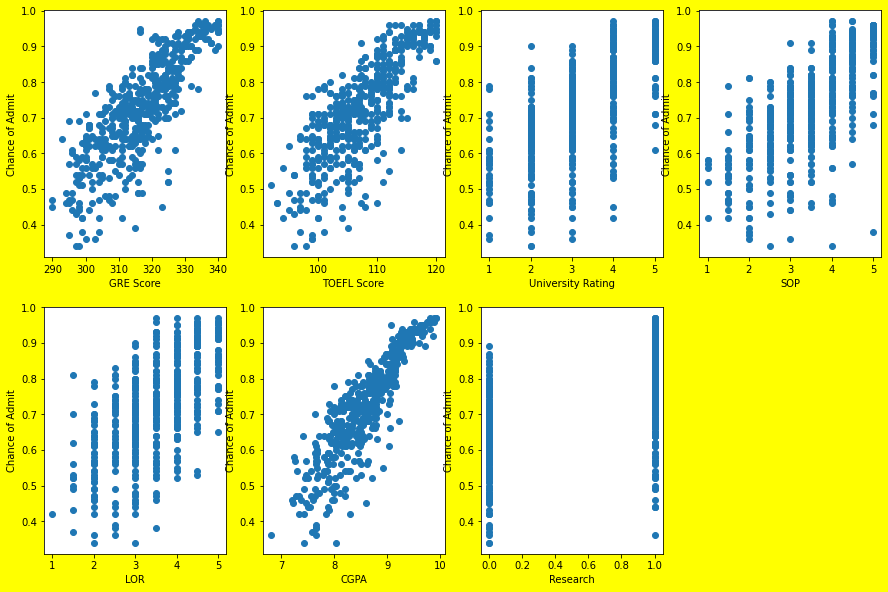

In [12]:
# Visualizing relationship

plt.figure(figsize=(15,10), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        # Using scattered plot to check relationship between x & y (Distplot is used for only checking X data)
        
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    
    plotnumber+=1
plt.show()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity a ssumption is satisfied.

# Using standardscaler 

To make sure that model will treat all the feature's equal importance to all the feature's. To make sure all this feature are treated / given importance by model we will convert whole data to normal scale by using standard scaler.

In [13]:
# Data scaling. Formula z = (x - mean)/std

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [14]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

###### You can also get help within notebook and refer whenever you have any confution.

help(LinearRegression)

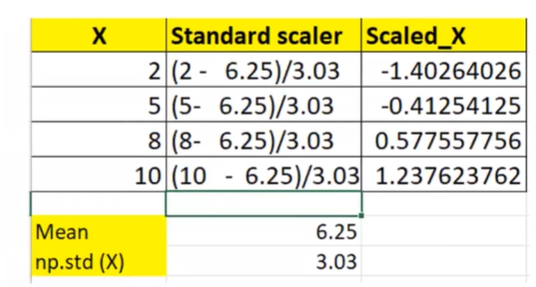

Let's go ahead and use linear regression and see how good it fits our data. But first, let's split our data in train and test.

### Spliting data into train and test. Model will be built on training data and tested on test data.


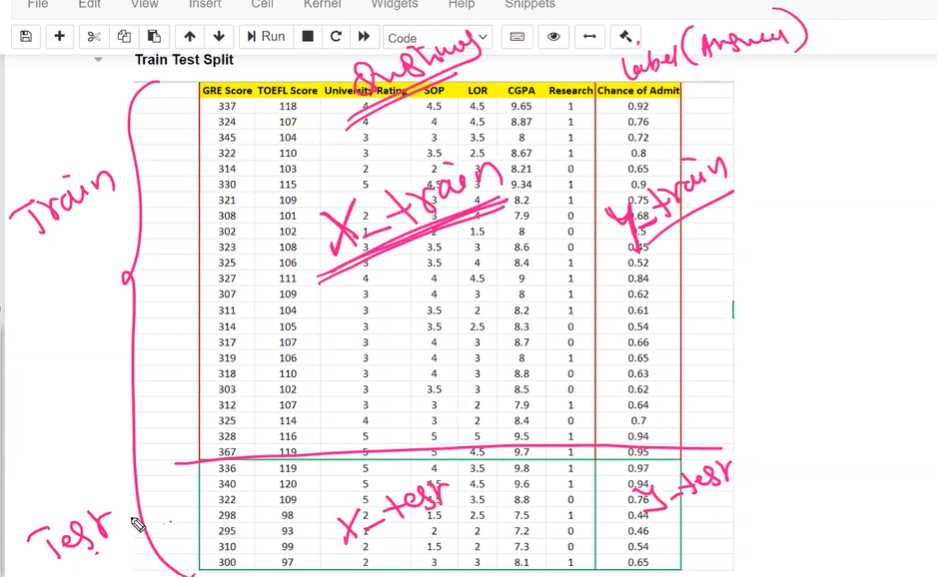

In [15]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=348)

y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model Instantiating and Training

In [16]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

# Predict the chance of admission given features

In [17]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


# Since we have already fit the scaler, you can transform the data

In [18]:
print ('Chance of Admission is : ' ,regression.predict(scaler.transform([[312.0, 103.0, 4.0, 4.0, 5.0, 8.43, 0]])))

Chance of Admission is :  [0.70070599]


**Above we can see that chance of admission result is 0.70070599 (70%) which is closer to actual label data (73%)**

# You can save the model and later you can use it for prediction

In [19]:
# Saving the model to the local file system

pickle.dump(regression, open('reg_model', 'wb'))

# reg_model = saving model with this name
# wb = write binary

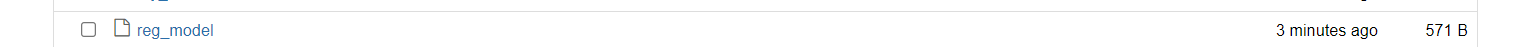

In [20]:
# prediction using the saved model

loaded_model = pickle.load(open('reg_model', 'rb')) # rb = read binary

a = loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))

a

array([0.63715829])

# Let's check how well model fits on train data

In [21]:
# Adjusted R2 Score
regression.score(x_train,y_train)

0.82855357382842

# Let's check how well model fits the test data

In [22]:
regression.score(x_test,y_test)

0.7928310580010802

***This model is correct upto 79.28%***

# Let's plot and visualize

In [23]:
y_pred = regression.predict(x_test)

In [24]:
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

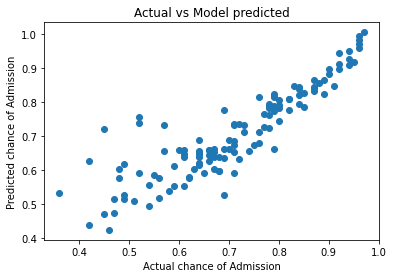

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual vs Model predicted')
plt.show()

# Model Evaluation

- **Mean absolute error (MAE):** Represents average error

- **Mean squared error (MSE):** Similar to MAE but noise is exaggerated and larger errors are "punished". It is harder to interpret than MAE as it's not in base units, however, it is generally more popular.

- **Root mean squared error (RMSE):** Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it's in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
y_pred = regression.predict(x_test)

In [28]:
# Mean absolute error (MAE):

mean_absolute_error(y_test,y_pred)

0.04421359936541998

In [29]:
# Mean squared error (MSE):

mean_squared_error(y_test,y_pred)

0.004309172332351598

In [30]:
# Root mean squared error (RMSE): 

np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485888

# Metrics report

- MAE = 0.04
- MSE = 0.004
- RMSE = 0.06

# Linear Regression model is completed!!!

Now let's check if our model is overfitting our data using regularization.

Let's see if our model is overfitting our training data.

# Regularization

When we use regression models to train some data, there is a good chance that the model will overfit the given training data set. Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting.

To regularize the model, a Shrinkage penalty is added to the cost function. Let's see different types of regularizations in regression:

- LASSO
- RIDGE
- ELASTICNET (Less popular)

###### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)

LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

**regularization:**
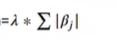

Where, λ is the shrinkage factor.


Note: Lasso will give 0 importance to the feature's which are not related, it will remove that unrelated feature from data set.

###### Ridge Regression (L2 Form)

Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by 

**regularzation:**
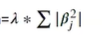

Where, λ is the shrinkage factor.


Note: It will not remove the feature which are not helping in learning model, but it will give very low importance to those features.

###### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn't help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter A. So, in addition to regularizing, lasso also performs feature selection.

###### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won't fit well for dataset different than training data. The tuning parameter A controls this bias and variance tradeoff. When the value of A is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of A is the key. The value of A is selected using cross-validation methods. A set of A is selected and cross-validation error is calculated for each value of A and that value of A is selected for which the cross-validation error is minimum.

In [32]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Lasso Regularization

In [36]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L2-norm

lassoCV = LassoCV(alphas = None, max_iter = 100, normalize = True)

lassoCV.fit(x_train,y_train)

# alphas = None (as we need to get alphas will be setting it as none)
# max_iter = 100 (we are informing model to learn & iterate 100 time - study 100 times)
# normalize = True (we are bringing data to a normal scale - kind of standarizing the data)

LassoCV(max_iter=100, normalize=True)

In [39]:
# Best alpha parameter

alpha = lassoCV.alpha_
alpha

3.6581160575233456e-05

0.0000365 - Alpha rate/ Learning rate

In [41]:
# Now that we have best parameter, Let's use lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.6581160575233456e-05)

In [42]:
lasso_reg.score(x_test, y_test)

0.7929405985679443

***This model is correct upto 79.29%***

linear regression model accuracy = 79.28%
lasso regularization accuarcy = 79.29%

Here we can confirm that our linear regression model was not overfitting

# Using Ridge regression model

In [53]:
# RidgeCV will return best alpha and coefficient after performing 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
# If we use None (it will keep on training many times) so we will use np.arrange (to give range to learning)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [54]:
ridgecv.alpha_

0.011

In [55]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [56]:
ridge_model.score(x_test, y_test)

0.7928315548978402

***This model is correct upto 79.28%***

Which means, Regression model, Lasso model, Ridge model are similar and we can use any one of them (Regression model is not overfitting)

We got around same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our 'Original Linear Regression' model has been well trained over the training data and there is no overfitting.